In [1]:
import requests
import fitz  # PyMuPDF
from io import BytesIO
import pandas as pd
import numpy as np

In [ ]:
# URL of the hosted PDF
pdf_url = "https://ak-static.cms.nba.com/referee/injury/Injury-Report_2024-11-08_12AM.pdf"

# Download the PDF
response = requests.get(pdf_url)
response.raise_for_status()

In [4]:
pdf_document = fitz.open(stream=BytesIO(response.content), filetype="pdf")

In [5]:
page = pdf_document[0]

In [6]:
tabs = page.find_tables()

In [9]:
tab = tabs[0]

for cell in tab.header.cells:
    print(f"Table column nmaes: {tab.header.names}, external: {tab.header.external}")

Table column nmaes: ['Game Date', 'Game Time', 'Matchup', 'Team', 'Player Name', 'Current Status', 'Reason'], external: False
Table column nmaes: ['Game Date', 'Game Time', 'Matchup', 'Team', 'Player Name', 'Current Status', 'Reason'], external: False
Table column nmaes: ['Game Date', 'Game Time', 'Matchup', 'Team', 'Player Name', 'Current Status', 'Reason'], external: False
Table column nmaes: ['Game Date', 'Game Time', 'Matchup', 'Team', 'Player Name', 'Current Status', 'Reason'], external: False
Table column nmaes: ['Game Date', 'Game Time', 'Matchup', 'Team', 'Player Name', 'Current Status', 'Reason'], external: False
Table column nmaes: ['Game Date', 'Game Time', 'Matchup', 'Team', 'Player Name', 'Current Status', 'Reason'], external: False
Table column nmaes: ['Game Date', 'Game Time', 'Matchup', 'Team', 'Player Name', 'Current Status', 'Reason'], external: False


In [10]:
df = tab.to_pandas()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game Date       0 non-null      float64
 1   Game Time       0 non-null      float64
 2   Matchup         0 non-null      float64
 3   Team            0 non-null      float64
 4   Player Name     0 non-null      float64
 5   Current Status  0 non-null      float64
 6   Reason          0 non-null      float64
dtypes: float64(7)
memory usage: 124.0 bytes


In [12]:
df.head()

,Game Date,Game Time,Matchup,Team,Player Name,Current Status,Reason


In [13]:
import camelot

In [14]:
pdf_path = "temp.pdf"

In [15]:
with open(pdf_path, "wb") as f:
    f.write(response.content)

In [23]:
tables = camelot.read_pdf(pdf_path, pages="all", flavor = "hybrid", process_background = True, )

In [24]:
tables

<TableList n=36>

In [32]:
for i, table in enumerate(tables):
    #print(f"Table {i + 1}:\n", table.df)

IndentationError: expected an indented block (3102118142.py, line 2)

In [26]:
table_1 = tables[0]

In [28]:
table_1.df

,0,1,2,3,4
0,,,Injury Report: 11/08/24 12:30 AM,,
1,Matchup,Team,Player Name,Current Status,Reason
2,ATL@DET,Atlanta Hawks,"Barlow, Dominick",Out,G League - Two-Way
3,,,,,Injury/Illness - Right Hamstring;
4,,,"Bogdanovic, Bogdan",Out,
5,,,,,Tendinopathy
6,,,,,Injury/Illness - Right Shoulder;
7,,,"Bufkin, Kobe",Out,
8,,,,,Subluxation
9,,,,,Injury/Illness - Right Knee; Injury


In [29]:
page = pdf_document[0]
words = page.get_text("words")

x_coords = sorted(set(word[0] for word in words))

In [31]:
# Print words alongside their x-coordinates
print(f"{'Word':<20} {'X-Coordinate'}")
print("=" * 40)
for word in words:
    x_coord = word[0]  # Extract x0 (leftmost x-coordinate)
    text = word[4]  # Extract actual word text
    print(f"{text:<20} {x_coord:.2f}")  # Format output nicely

Word                 X-Coordinate
Injury               288.13
Report:              354.64
11/08/24             437.34
12:30                538.84
AM                   601.49
Page                 398.53
1                    420.43
of                   427.76
8                    438.35
Game                 23.15
Date                 52.97
Game                 119.59
Time                 149.41
Matchup              199.95
Team                 264.24
Player               424.98
Name                 456.87
Current              585.71
Status               624.06
Reason               666.07
11/08/2024           24.15
07:00                120.59
(ET)                 145.80
ATL@DET              200.95
Atlanta              265.24
Hawks                297.12
Barlow,              425.98
Dominick             459.16
Out                  586.71
G                    667.07
League               675.64
-                    706.81
Two-Way              712.13
Bogdanovic,          425.98
Bogdan           

In [58]:
!pip install camelot-py[plot]

In [59]:
tables = camelot.read_pdf(pdf_path)

In [61]:
tables = camelot.read_pdf(pdf_path, pages="all", flavor = "hybrid", process_background = True)

In [62]:
tables

<TableList n=36>

In [63]:
tables[0].df

,0,1,2,3,4
0,,,Injury Report: 11/08/24 12:30 AM,,
1,Matchup,Team,Player Name,Current Status,Reason
2,ATL@DET,Atlanta Hawks,"Barlow, Dominick",Out,G League - Two-Way
3,,,,,Injury/Illness - Right Hamstring;
4,,,"Bogdanovic, Bogdan",Out,
5,,,,,Tendinopathy
6,,,,,Injury/Illness - Right Shoulder;
7,,,"Bufkin, Kobe",Out,
8,,,,,Subluxation
9,,,,,Injury/Illness - Right Knee; Injury


C:\Users\greg.shoda\AppData\Local\Temp\ipykernel_26288\1526443954.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind = 'grid').show()


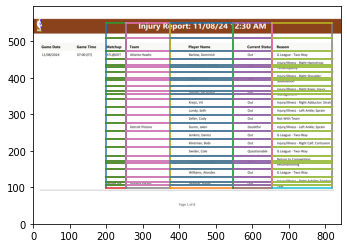

In [64]:
camelot.plot(tables[0], kind = 'grid').show()

C:\Users\greg.shoda\AppData\Local\Temp\ipykernel_26288\1239783813.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[1], kind = 'grid').show()


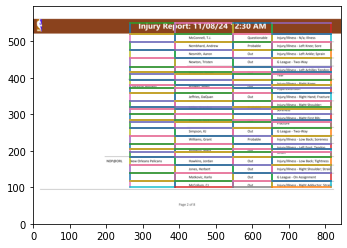

In [70]:
tables[1].df
camelot.plot(tables[1], kind = 'grid').show()

C:\Users\greg.shoda\AppData\Local\Temp\ipykernel_26288\2582469891.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[4], kind = 'grid').show()


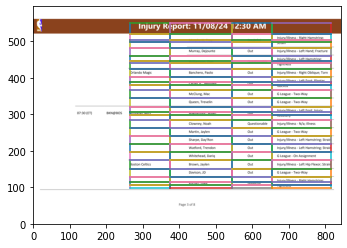

In [73]:
tables[4].df
camelot.plot(tables[4], kind = 'grid').show()

In [75]:
lattice_tables

<TableList n=0>

In [76]:
network_tables = camelot.read_pdf(pdf_path, flavor = 'network')

In [77]:
network_tables

<TableList n=1>

In [80]:
network_tables[0].df

,0,1,2,3,4
0,,,Injury Report: 11/08/24 12:30 AM,,
1,Matchup,Team,Player Name,Current Status,Reason
2,ATL@DET,Atlanta Hawks,"Barlow, Dominick",Out,G League - Two-Way
3,,,,,Injury/Illness - Right Hamstring;
4,,,"Bogdanovic, Bogdan",Out,
5,,,,,Tendinopathy
6,,,,,Injury/Illness - Right Shoulder;
7,,,"Bufkin, Kobe",Out,
8,,,,,Subluxation
9,,,,,Injury/Illness - Right Knee; Injury


In [81]:
stream_tables = camelot.read_pdf(pdf_path, pages = 'all', flavor = 'stream', strip_text = "\n")

In [82]:
stream_tables

<TableList n=1>

In [83]:
stream_tables[0]

<Table shape=(25, 7)>

In [84]:
stream_tables[0].df

,0,1,2,3,4,5,6
0,Game Date,Game Time,Matchup,Team,Player Name,Current Status,Reason
1,11/08/2024,07:00 (ET),ATL@DET,Atlanta Hawks,"Barlow, Dominick",Out,G League - Two-Way
2,,,,,,,Injury/Illness - Right Hamstring;
3,,,,,"Bogdanovic, Bogdan",Out,
4,,,,,,,Tendinopathy
5,,,,,,,Injury/Illness - Right Shoulder;
6,,,,,"Bufkin, Kobe",Out,
7,,,,,,,Subluxation
8,,,,,,,Injury/Illness - Right Knee; Injury
9,,,,,"Hunter, De'Andre",Out,


In [96]:
stream_tables_stripped = camelot.read_pdf(pdf_path, pages = 'all', flavor = 'stream', strip_text = "\n", row_tol = 18)

In [97]:
stream_tables_stripped[0].df

,0,1,2,3,4,5,6
0,Game Date,Game Time,Matchup,Team,Player Name,Current Status,Reason
1,11/08/2024,07:00 (ET),ATL@DET,Atlanta Hawks,"Barlow, Dominick",Out,G League - Two-Way
2,,,,,"Bogdanovic, Bogdan",Out,Injury/Illness - Right Hamstring;Tendinopathy
3,,,,,"Bufkin, Kobe",Out,Injury/Illness - Right Shoulder;Subluxation
4,,,,,"Hunter, De'Andre",Out,Injury/Illness - Right Knee; InjuryManagement
5,,,,,"Krejci, Vit",Out,Injury/Illness - Right Adductor; Strain
6,,,,,"Lundy, Seth",Out,Injury/Illness - Left Ankle; Sprain
7,,,,,"Zeller, Cody",Out,Not With Team
8,,,,Detroit Pistons,"Duren, Jalen",Doubtful,Injury/Illness - Left Ankle; Sprain
9,,,,,"Jenkins, Daniss",Out,G League - Two-Way


In [129]:
dfs = []

In [ ]:
Game                 23.15
Date                 52.97
Game                 119.59
Time                 149.41
Matchup              199.95
Team                 264.24
Player               424.98
Name                 456.87
Current              585.71
Status               624.06
Reason               666.07

In [130]:
all_stream_tables = camelot.read_pdf(pdf_path, pages = 'all', flavor = 'stream', strip_text = "\n", row_tol = rrrrrrrrr

In [131]:
for x in range(len(tabs)):
    table = tabs[x].df
    if x == 0:
        table = table.iloc[2:]
    else:
        table = table.iloc[1:]
    
    dfs.append(table)

In [132]:
concat_df = pd.concat(dfs, ignore_index = True)

In [133]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       191 non-null    object
 1   1       191 non-null    object
 2   2       191 non-null    object
 3   3       191 non-null    object
 4   4       114 non-null    object
 5   5       18 non-null     object
dtypes: object(6)
memory usage: 9.1+ KB


In [117]:
pd.set_option('display.max_rows', None)

In [155]:
columns = [0,23, 119, 199, 264, 424, 585, 666, 825]

In [179]:
columns = ["119,199,264,424,585,666"]

In [184]:
column_names = ["Game Date", "Game Time", "Matchup", "Team", "Player Name", "Current Status", "Reason"]

In [ ]:
dtypes = {'Game Date': 'datetime64[ns

In [216]:
all_stream_tables = camelot.read_pdf(pdf_path, pages = 'all', flavor = 'stream', row_tol = 18, columns = columns)
dfs = []

for x in range(len(all_stream_tables)):
    table = all_stream_tables[x].df

    table = table.iloc[1:]
    
    dfs.append(table)

concat_df = pd.concat(dfs, ignore_index = True)
concat_df.columns = column_names

In [217]:
concat_df[concat_df.select_dtypes(include=['object']).columns] = concat_df.select_dtypes(include=['object']).apply(lambda x: x.str.strip())

In [218]:
concat_df.replace("", np.nan, inplace = True)

In [220]:
concat_df.iloc[:, 0:4] = concat_df.iloc[:, 0:4].ffill()

In [222]:
concat_df['Game Date'] = pd.to_datetime(concat_df['Game Date'], format='%m/%d/%Y')

In [223]:
concat_df.head()

,Game Date,Game Time,Matchup,Team,Player Name,Current Status,Reason
0,2024-11-08,07:00 (ET),ATL@DET,Atlanta Hawks,"Barlow, Dominick",Out,G League - Two-Way
1,2024-11-08,07:00 (ET),ATL@DET,Atlanta Hawks,"Bogdanovic, Bogdan",Out,Injury/Illness - Right Hamstring;\nTendinopathy
2,2024-11-08,07:00 (ET),ATL@DET,Atlanta Hawks,"Bufkin, Kobe",Out,Injury/Illness - Right Shoulder;\nSubluxation
3,2024-11-08,07:00 (ET),ATL@DET,Atlanta Hawks,"Hunter, De'Andre",Out,Injury/Illness - Right Knee; Injury\nManagement
4,2024-11-08,07:00 (ET),ATL@DET,Atlanta Hawks,"Krejci, Vit",Out,Injury/Illness - Right Adductor; Strain


In [224]:
concat_df['Game Time'] = concat_df['Game Time'].str.replace(' (ET)', '')

In [225]:
concat_df['Game Time']

0      07:00
1      07:00
2      07:00
3      07:00
4      07:00
5      07:00
6      07:00
7      07:00
8      07:00
9      07:00
10     07:00
11     07:00
12     07:00
13     07:00
14     07:00
15     07:00
16     07:00
17     07:00
18     07:00
19     07:00
20     07:00
21     07:00
22     07:00
23     07:00
24     07:00
25     07:00
26     07:00
27     07:00
28     07:00
29     07:00
30     07:00
31     07:00
32     07:00
33     07:00
34     07:00
35     07:00
36     07:00
37     07:30
38     07:30
39     07:30
40     07:30
41     07:30
42     07:30
43     07:30
44     07:30
45     07:30
46     07:30
47     07:30
48     07:30
49     07:30
50     07:30
51     07:30
52     07:30
53     07:30
54     07:30
55     07:30
56     07:30
57     07:30
58     07:30
59     07:30
60     07:30
61     07:30
62     07:30
63     07:30
64     07:30
65     07:30
66     07:30
67     07:30
68     07:30
69     07:30
70     07:30
71     08:00
72     08:00
73     08:00
74     08:00
75     08:00
76     08:00